# CLIMATE 405: Machine Learning for Earth and Environmental Sciences; FALL 2024
## Mohammed Ombadi (ombadi@umich.edu)

# Lecture 13 (Wednesday, 16/09/2024)
# Topics covered in this lecture:
- Interpretability of Decision Trees.
- Feature Importance using Random Forests.
- Shapley Values for Feature Importance.

## Import libraries

In [58]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings

from scipy.integrate import odeint
from IPython.display import Image

# Sklearn specific functions used in this lecture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

import shap

# Suppress warnings
warnings.filterwarnings('ignore')

# Set number of decimals for np print options
np.set_printoptions(precision=3)

# Set the current working directory
os.chdir(sys.path[0])

## <center> Interpretability of a Decision Tree </center>

Let's revisit the classification tree we've built in the last lecture:

Import the data and encode categorical variables to numeric values:

In [7]:
data = pd.read_csv('partial_correlation_data_annual_categorical.csv')

# Define custom mapping for classes
P_mapping = {'dry': 0, 'wet': 1}
E_mapping = {'low': 0, 'high': 1}
S_mapping = {'low': 0, 'high': 1}

# Apply the custom mapping
data['P_encoded'] = data['Precipitation'].map(P_mapping)
data['E_encoded'] = data['Evaporation'].map(E_mapping)
data['S_encoded'] = data['Streamflow'].map(S_mapping)

# Features (X) and Target (y)
X = data[['P_encoded', 'E_encoded']]
y = data['S_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree Classifier
cl_tree = DecisionTreeClassifier()

# Train the classifier
cl_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cl_tree.predict(X_test)

Visulaize the tree (using the plot_tree function from sklearn.tree):

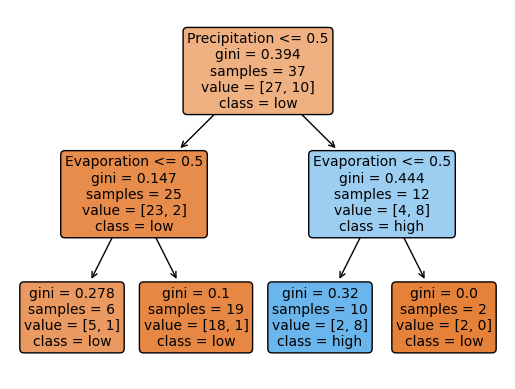

In [8]:
# Plot the decision tree
plot_tree(cl_tree, 
          feature_names=['Precipitation', 'Evaporation'],  # Use original feature names
          class_names= ['low', 'high'],  # Provide class names for target labels
          filled=True,  # Colors the nodes by class
          rounded=True,  # Rounds the node boxes
          fontsize=10)   # Set font size for readability

# Show the plot
plt.show()

#### What can we learn from this decision tree?

1)
2)
3)

## <center> Feature Importance using Random Forest Models </center>

Let's examine the application of feature importance in the [Ombadi & Varadharajan, Water Research 2022 study](https://www.sciencedirect.com/science/article/pii/S0043135422006170):

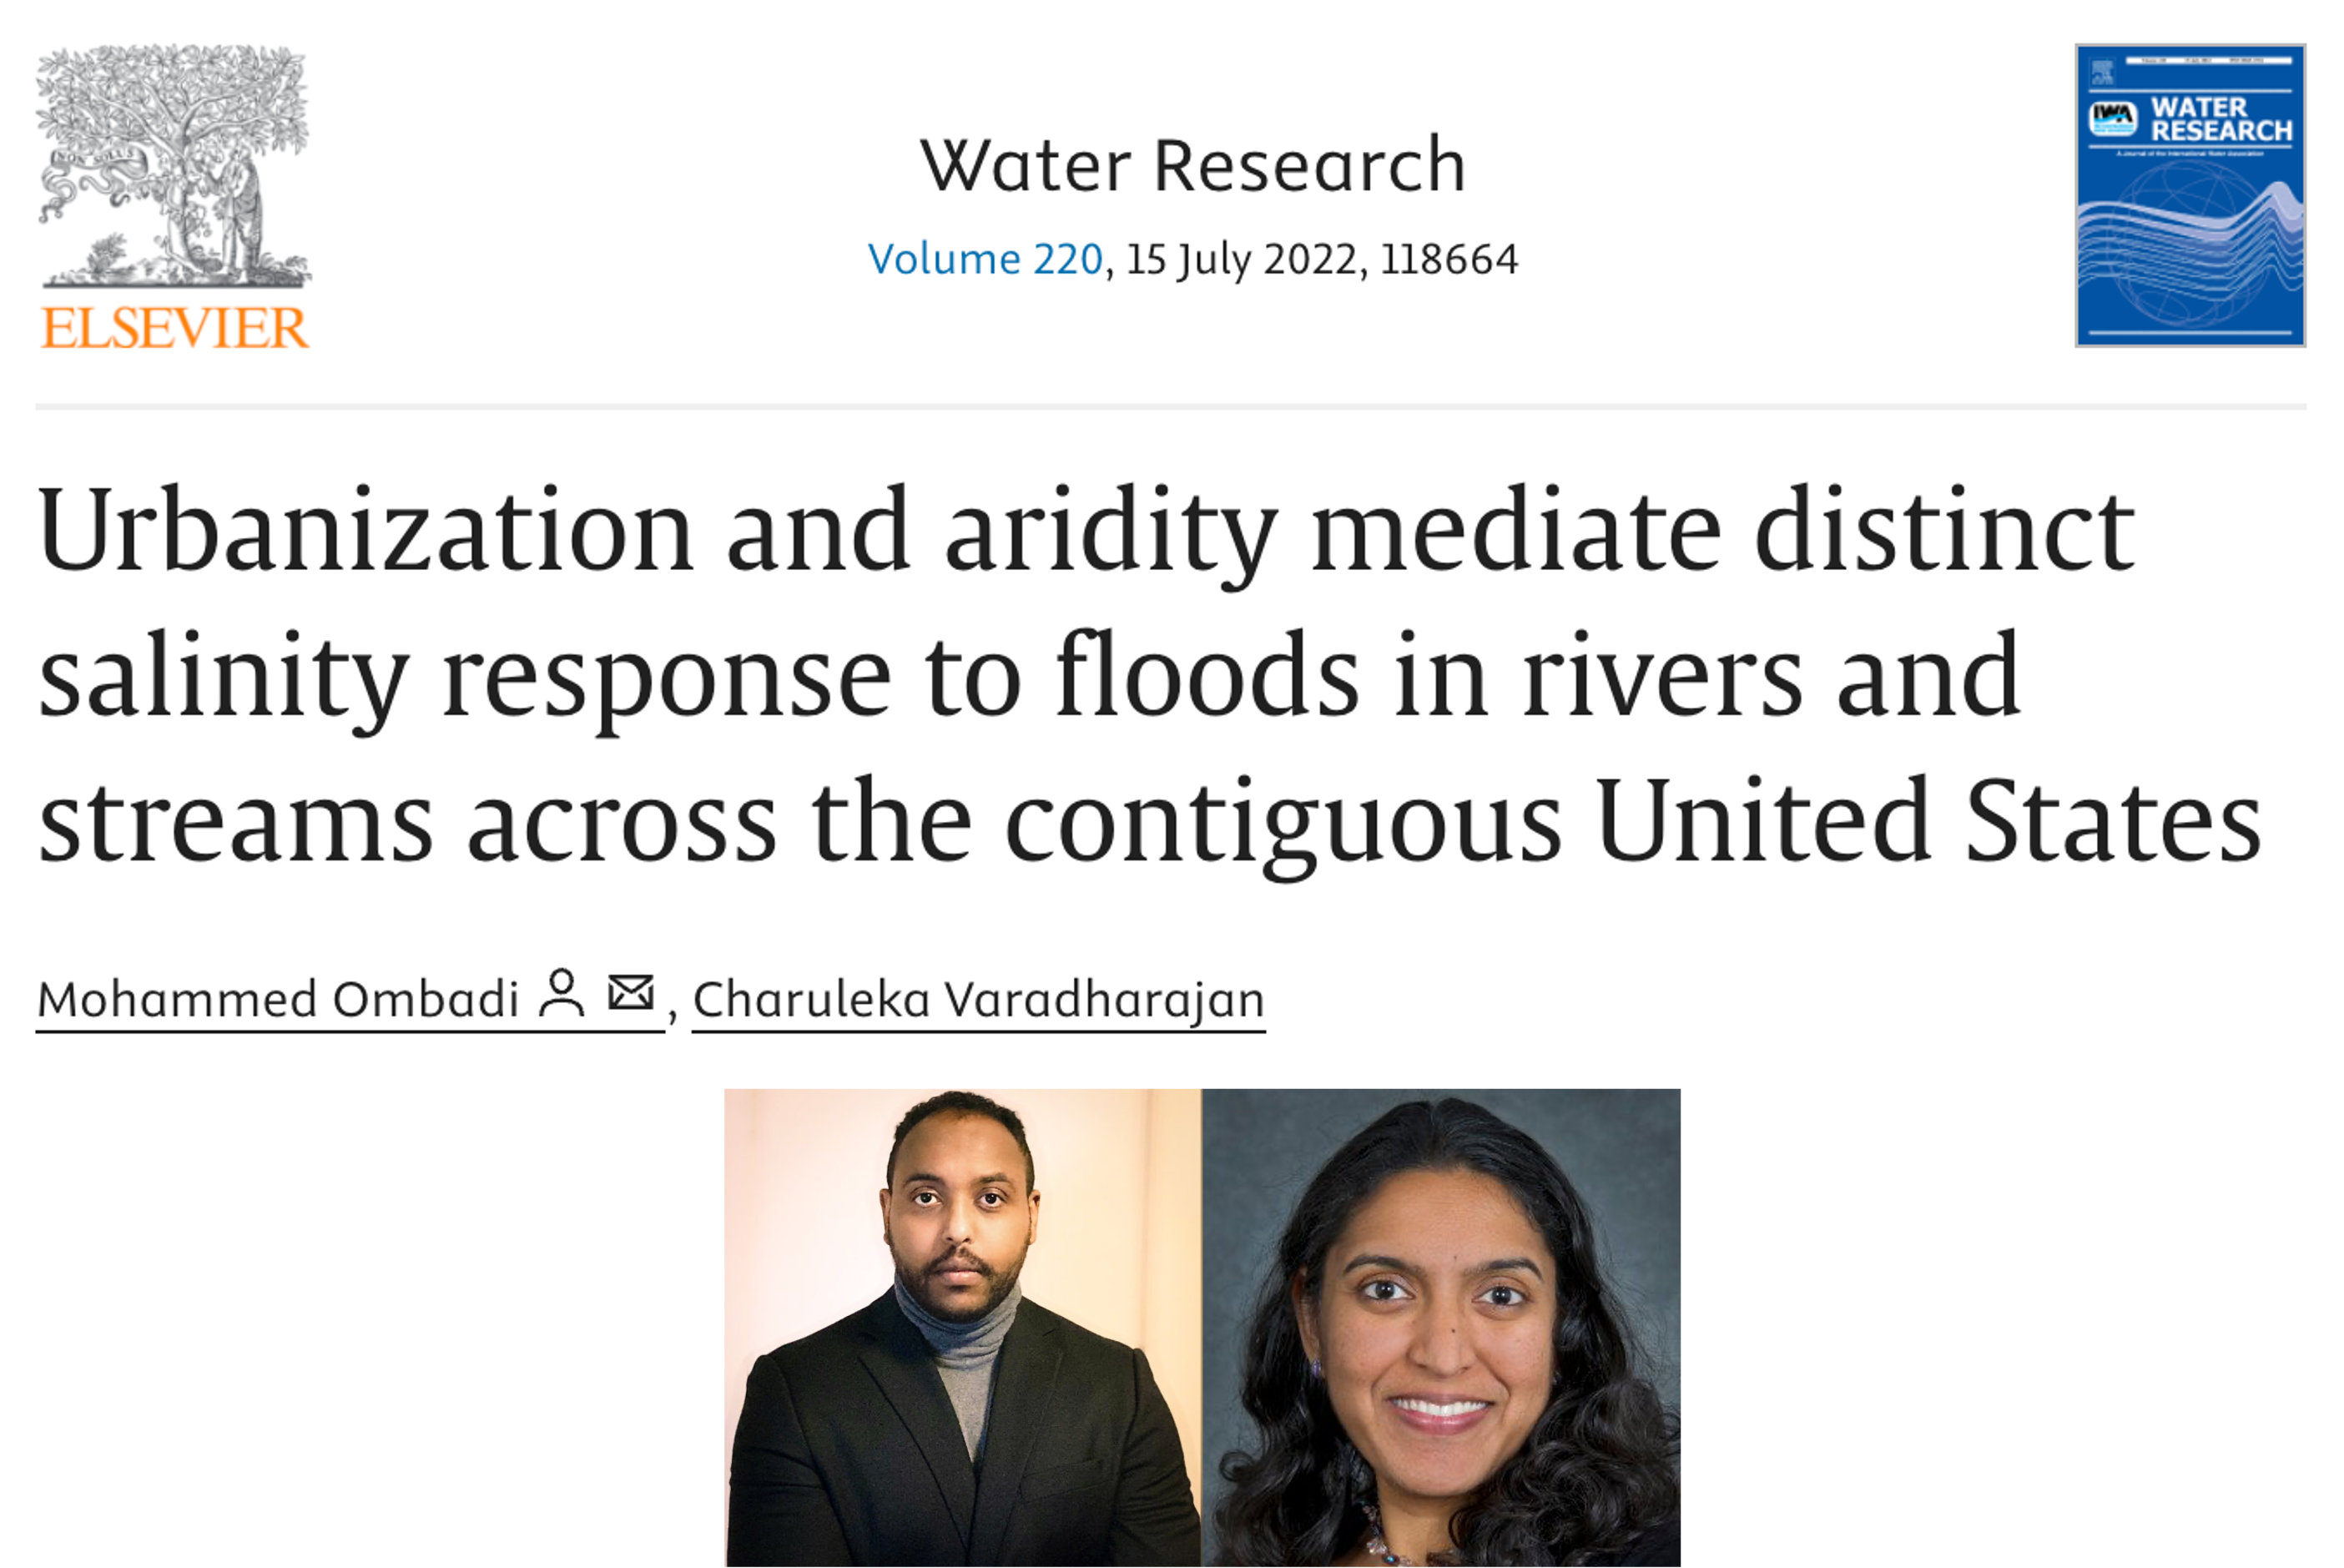

In [12]:
display(Image(filename = 'Ombadi & Varadharajan_2022.png', width= 650, height= 650))

One of the goals of this study is to explore the factors that mediate salinity response to floods within sites. The study used 16 predictors (shown in the table below) and one target variable, which is salinity during days of floods:

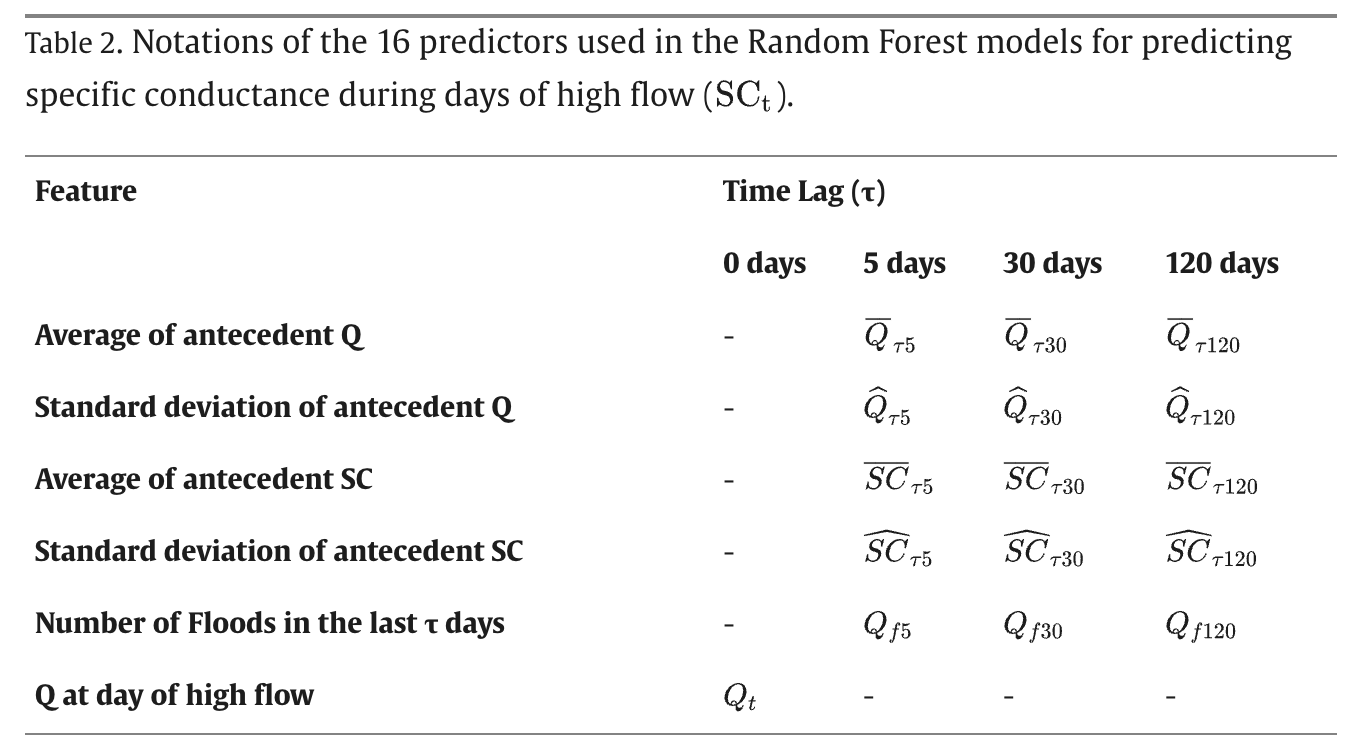

In [14]:
display(Image(filename = 'Ombadi & Varadharajn_Table 2.png', width= 650, height= 650))

Random Forest models were constructed for each site separately (a total of 259 sites), using the abovementioned 16 predictors. The accuracy of the RF models is summarized in the table below. 

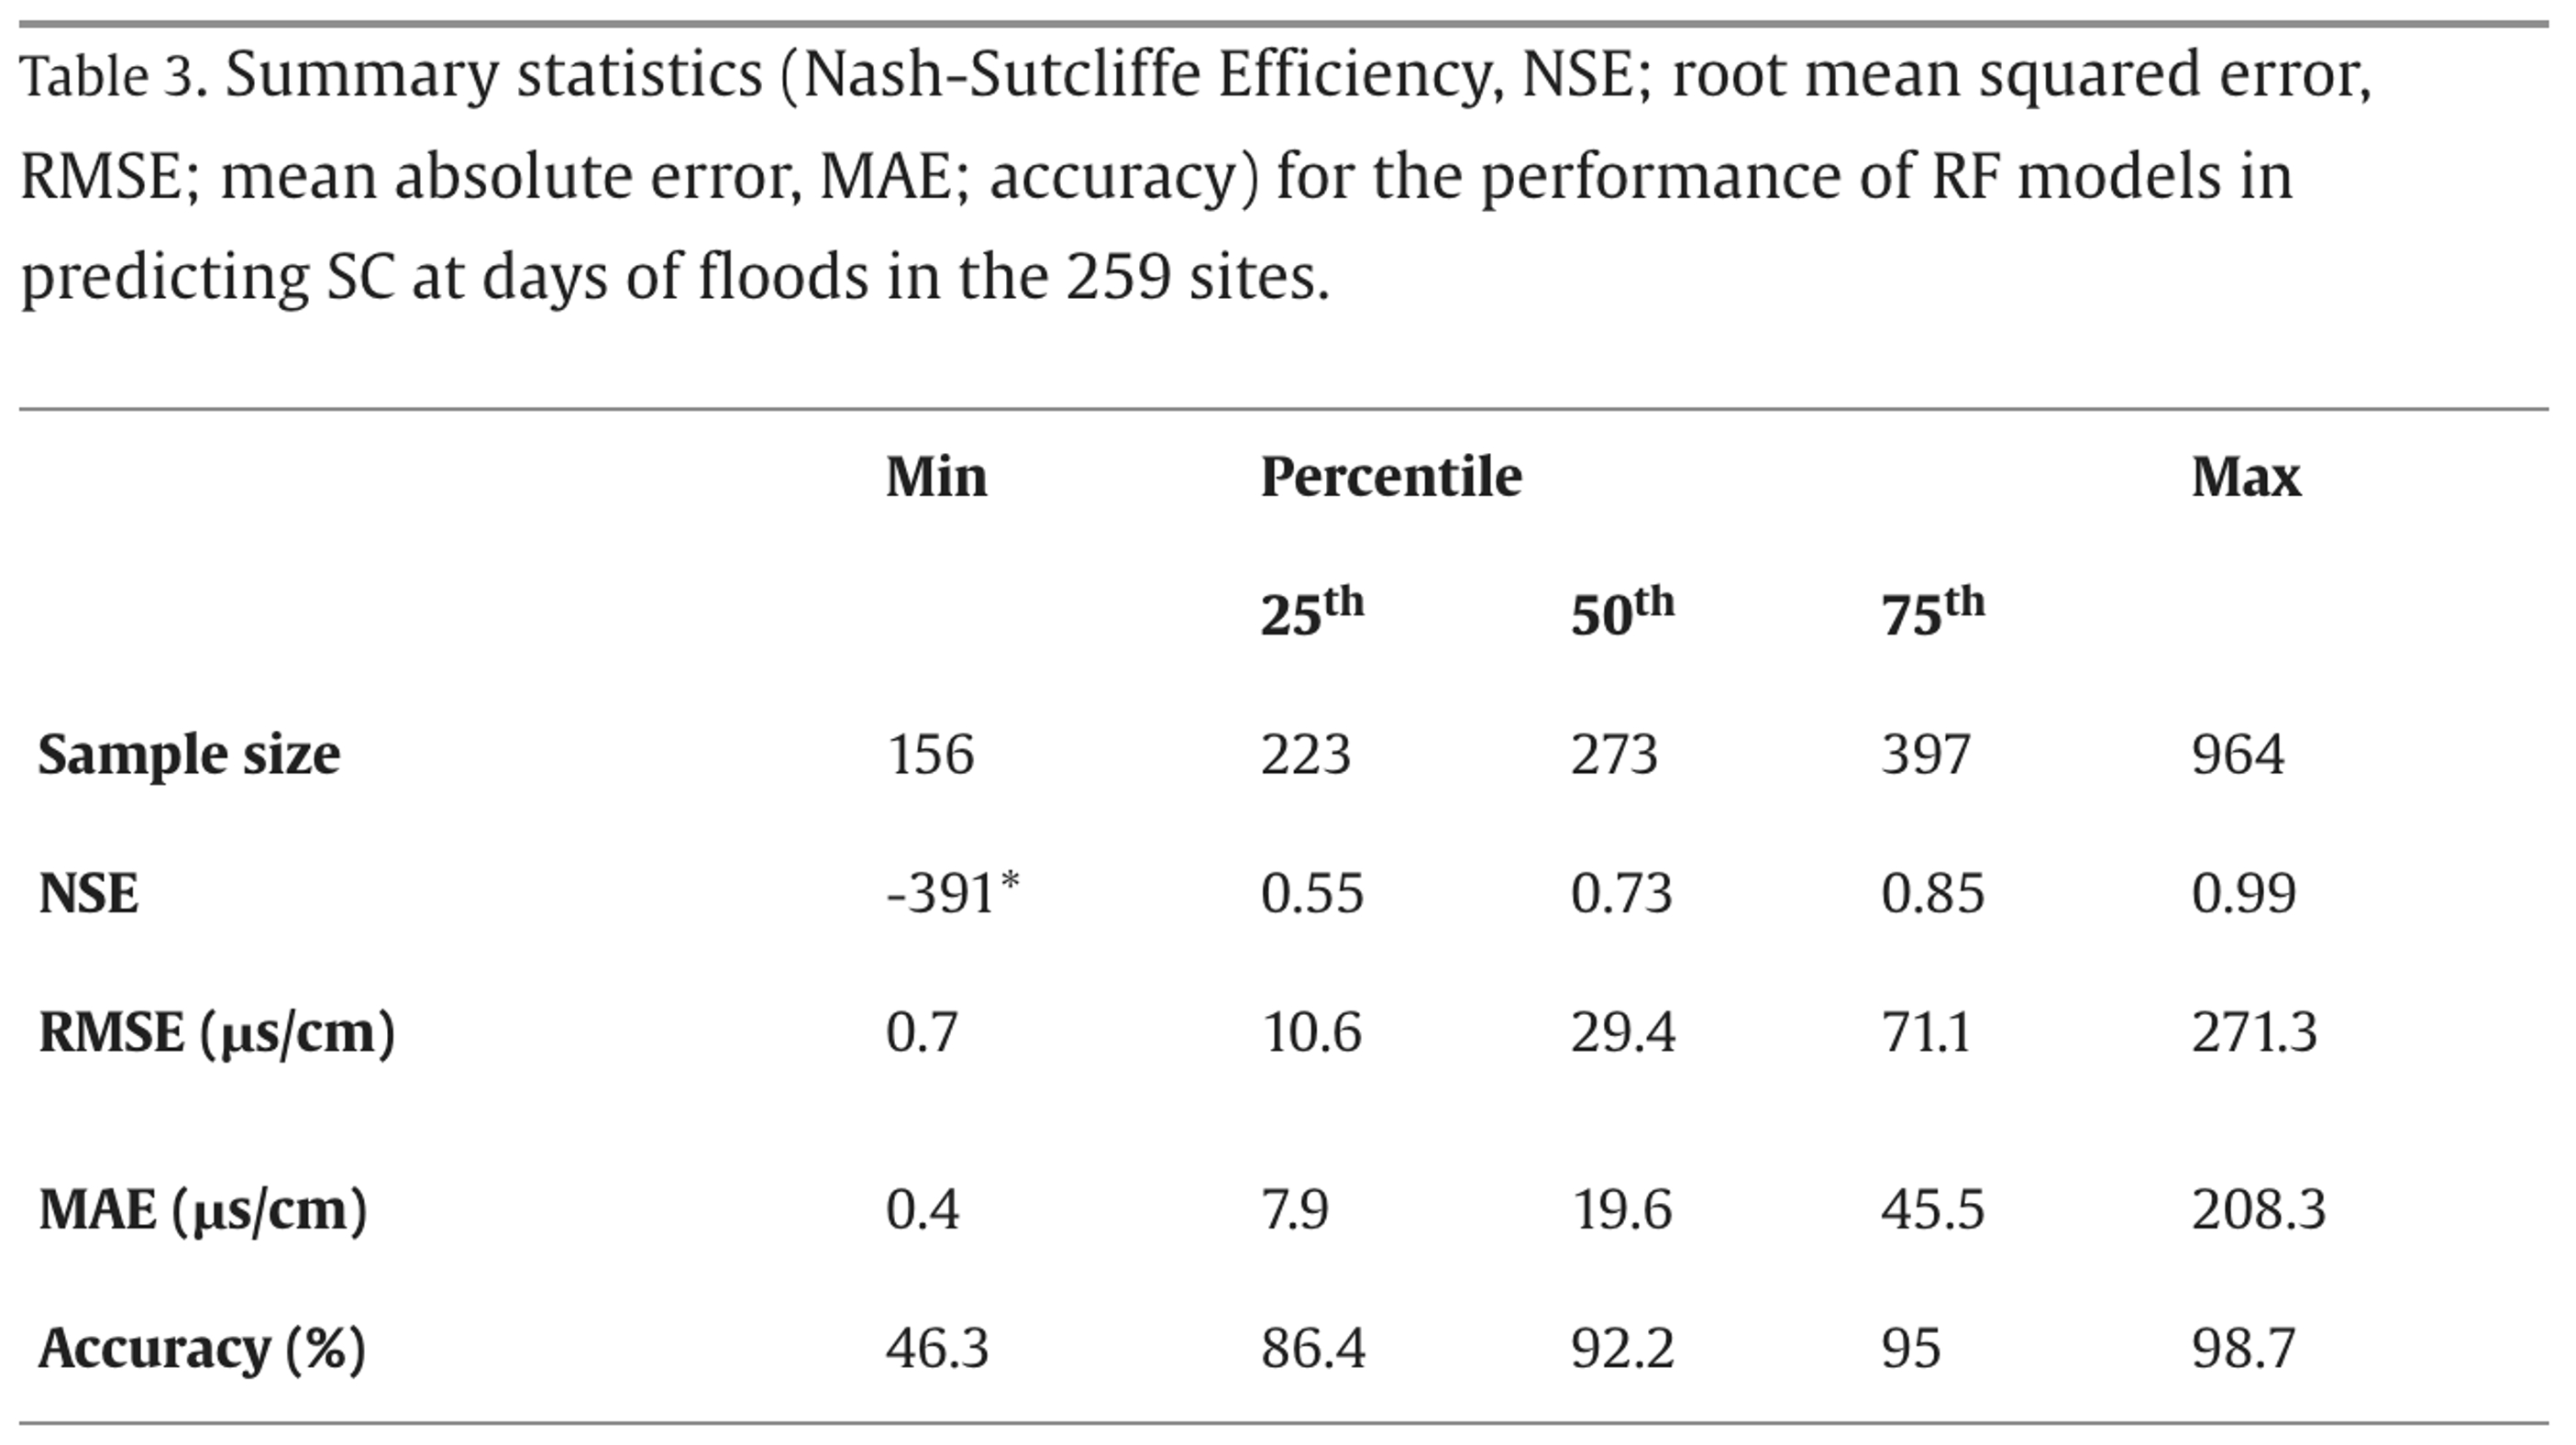

In [61]:
display(Image(filename = 'Ombadi & Varadharajn_Table 3.png', width= 650, height= 650))

#### What is NSE?

NSE is Nash-Sutcliffe Efficiency. 

The formula of NSE is: 

The range of NSE values and their interpretation is as follows:
- Range:
- An NSE value of XX means
- An NSE value of XX means

Then, feature importance is obtained for all sites:

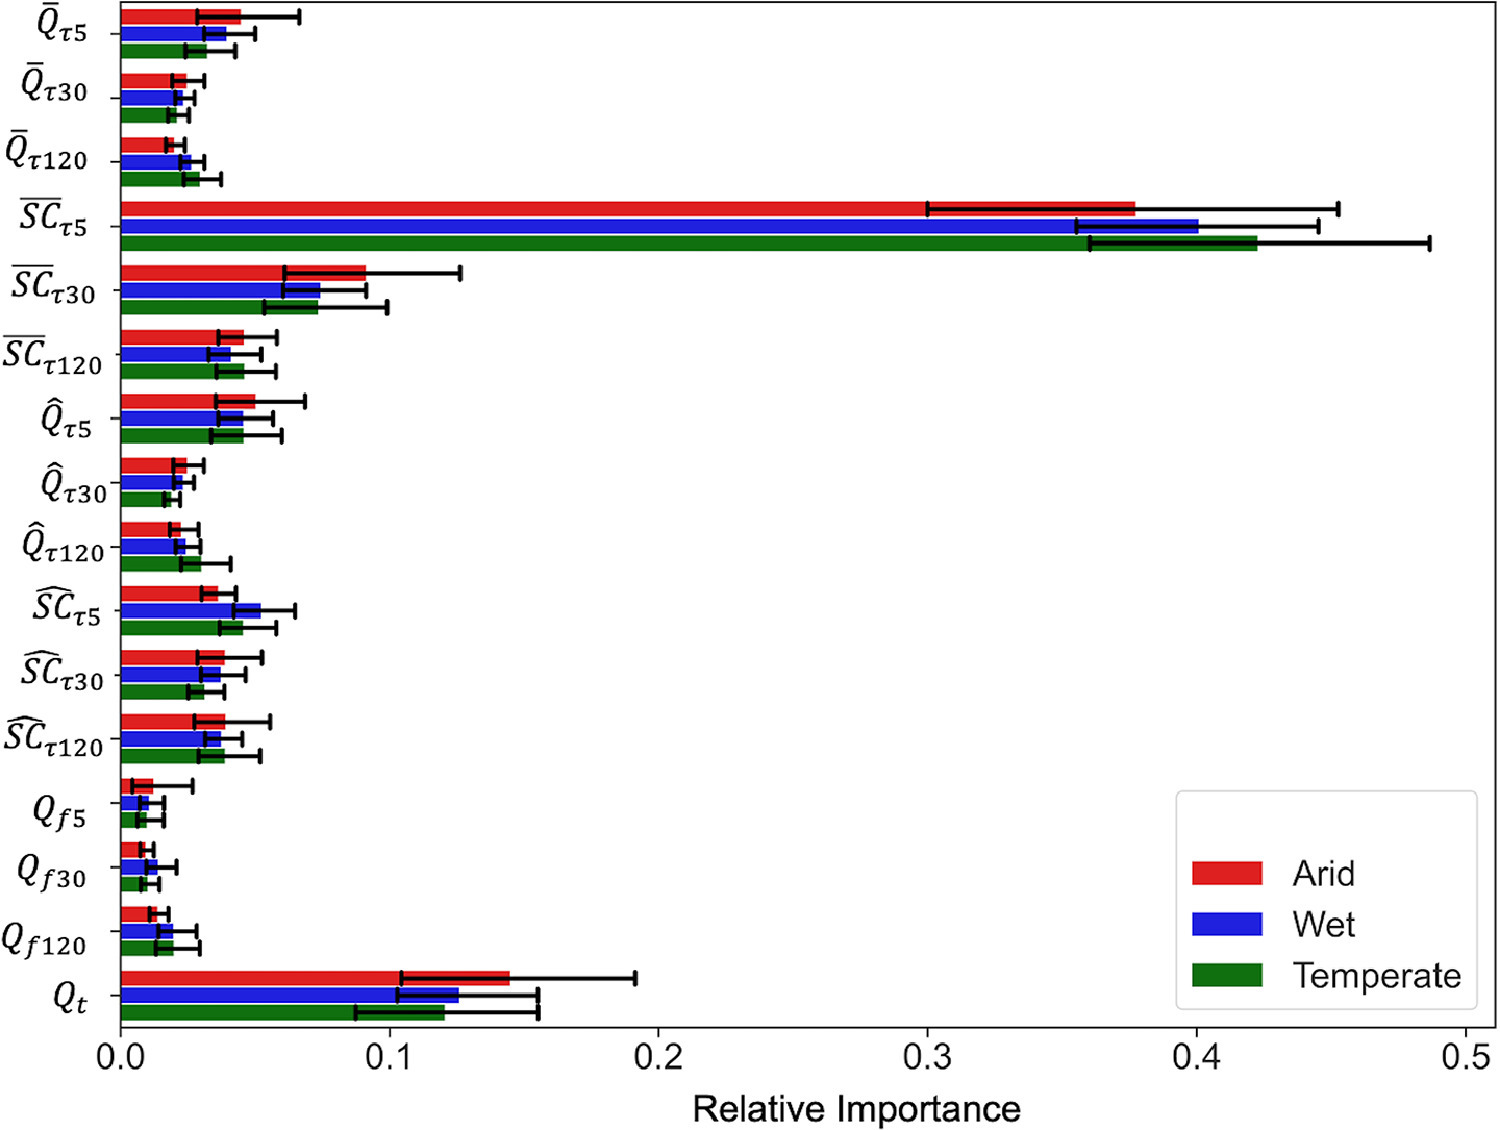

Figure caption: Relative feature importance of predictors used in the RF models to predict specific conductance at days of floods. The models were trained separately for each site of the 259 sites, then the obtained coefficients were averaged across sites in each climate zone (wet, temperate and arid). The length of the bars indicates the mean value, whereas the black lines show the error bars


In [21]:
display(Image(filename = 'Ombadi_Varadharajan_Figure 5.jpg', width= 650, height= 650))
print('Figure caption: Relative feature importance of predictors used in the RF models to predict specific conductance at days of floods. The models were trained separately for each site of the 259 sites, then the obtained coefficients were averaged across sites in each climate zone (wet, temperate and arid). The length of the bars indicates the mean value, whereas the black lines show the error bars')

<span style="font-size:20px;"> The results show that average conditions of salinity in the 5-days preceding the flood (short-term memory) is more important than the magnitude of flood in determining salinity.  </span>

### How can we get feature importance of a random forest model?

- Use the Scikit-learn "**RandomForestRegressor**" function to build the RF model.
- Use "**model.feature_importances_**" to get the feature importance
- Feature importance can also be obtained for other decision tree models (DecisionTreeClassifier, DecisionTreeRegressor ...etc.)

## <center> Shapley Values for Feature Importance </center>

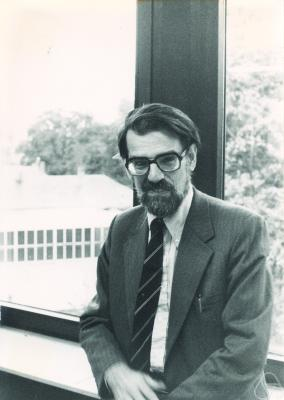

Lloyd Shapley


In [34]:
display(Image(filename = 'Shapley,_Lloyd_(1980).jpg', width= 250, height= 250))
print('Lloyd Shapley')

<span style="font-size:16px;"> **Shapley values**: a concept that originated from Game Theory, which aims to distribute gains and costs among agents in a cooperative game. </span>

Let's examine a [study](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023GL107929) that used Shapley values for interpretability:

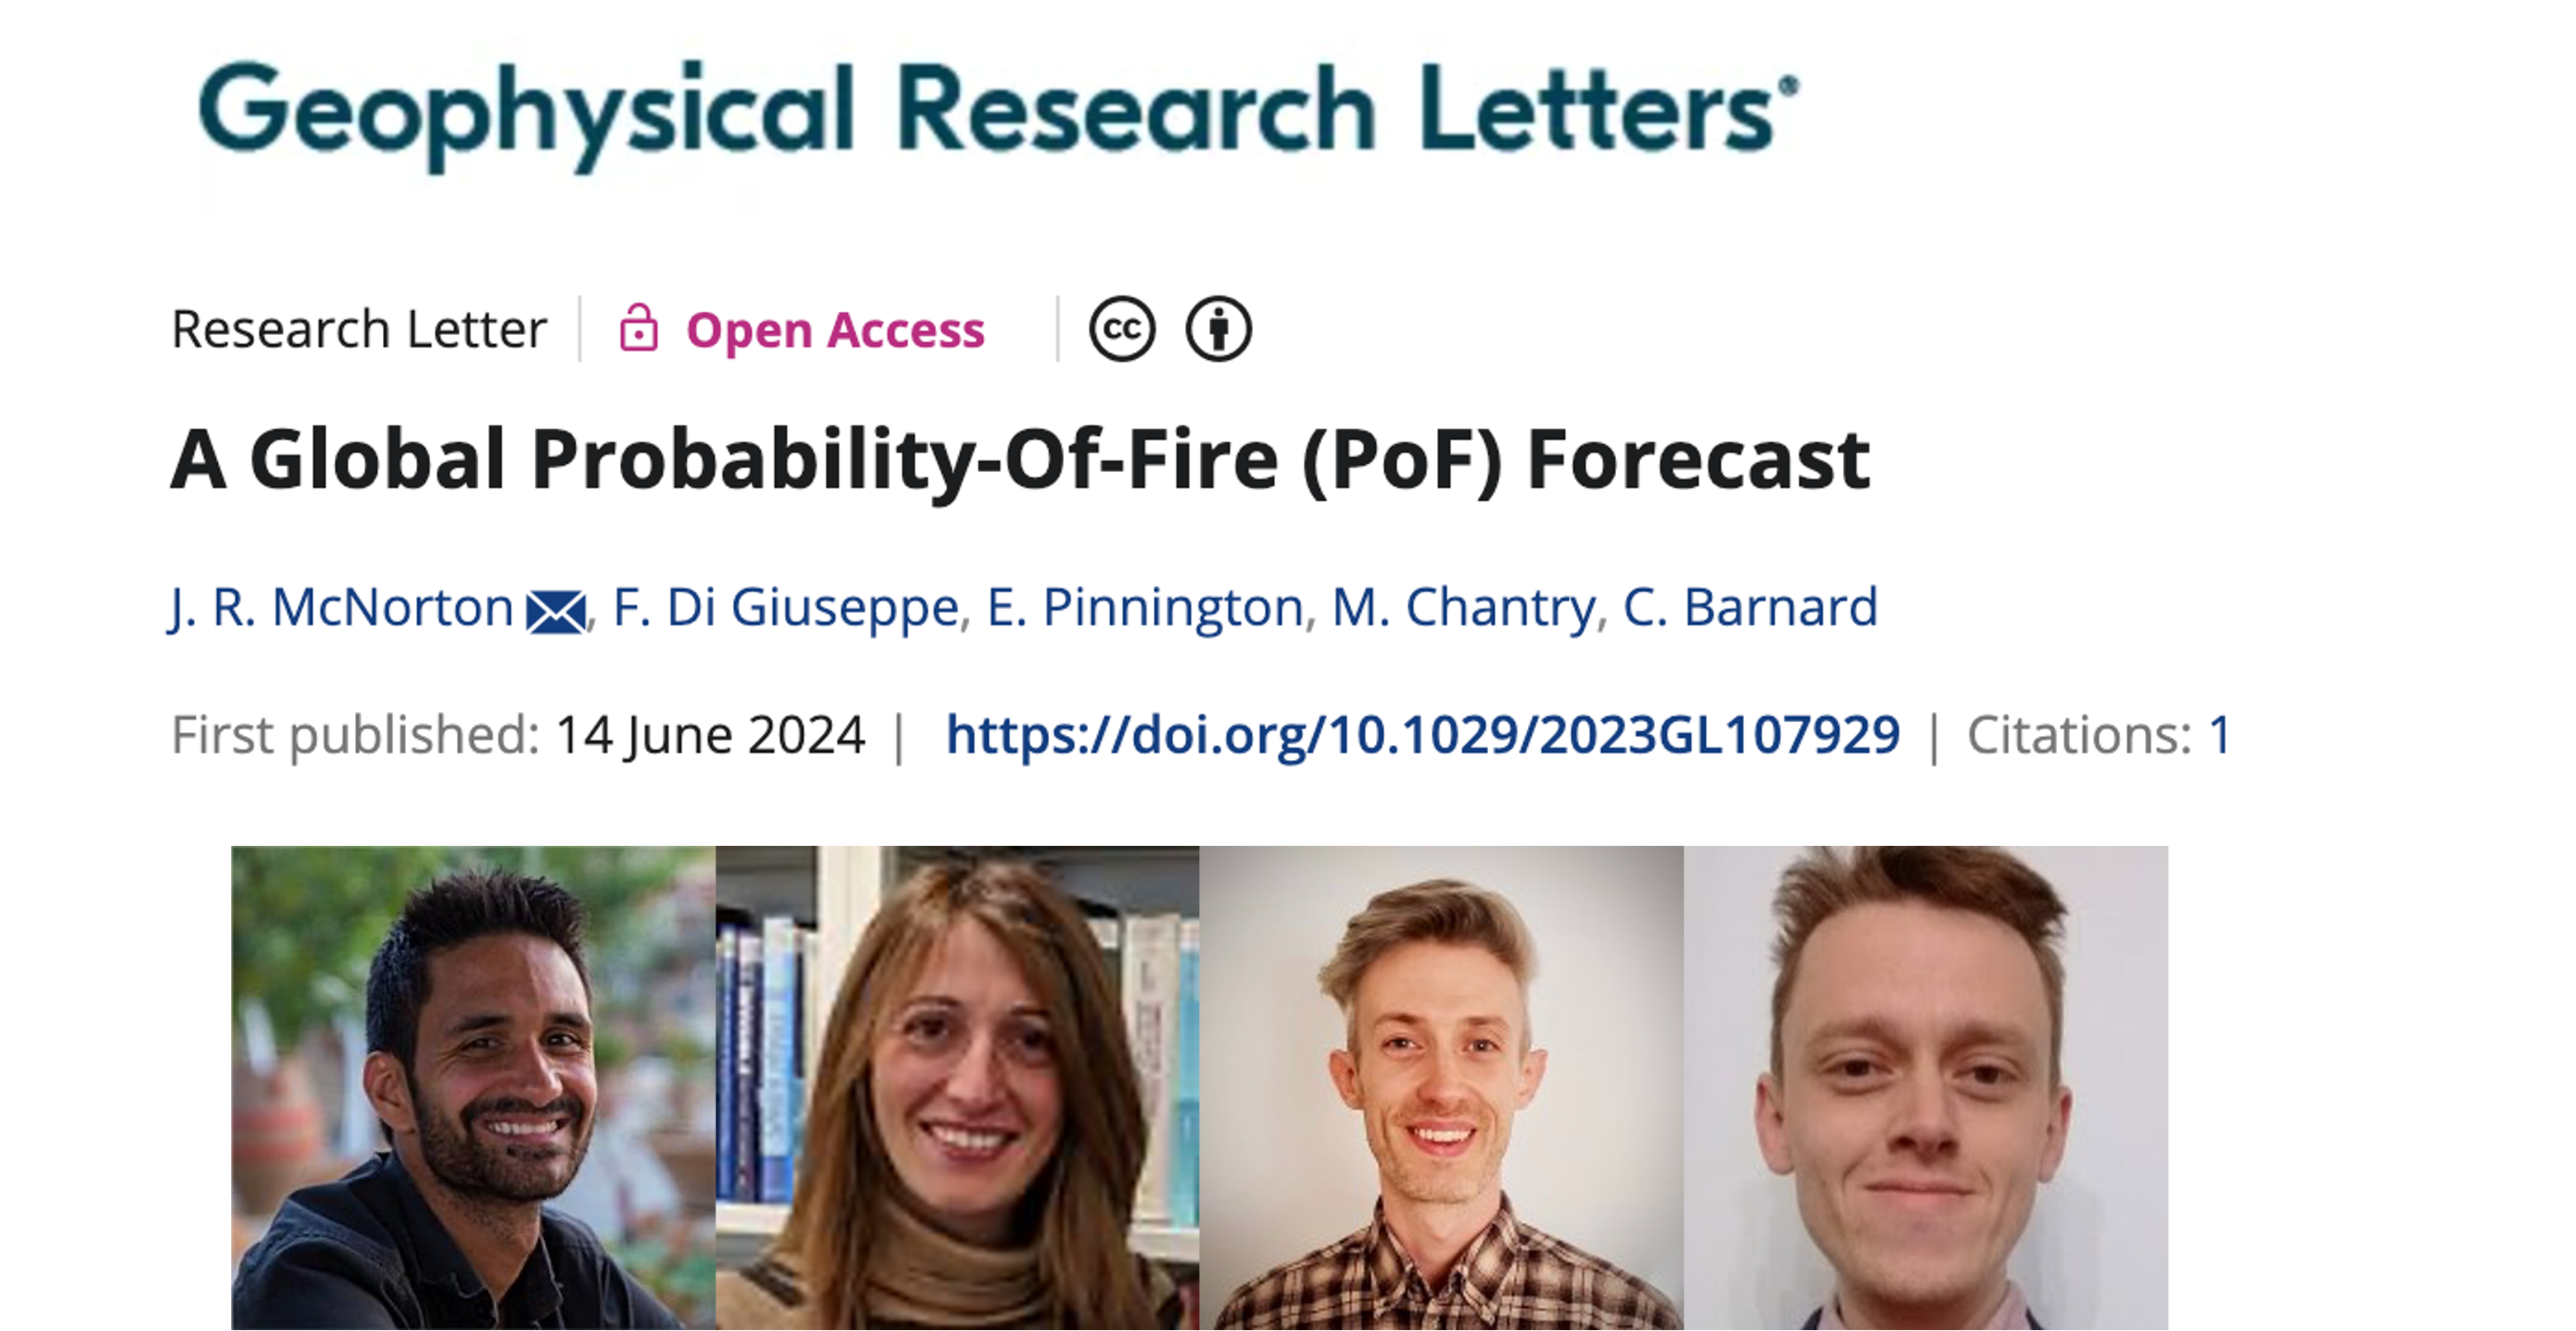

In [35]:
display(Image(filename = 'McNorton et al_GRL 2024.png', width= 650, height= 650))

- The goal of the study is to train a Random Forest (and XGBoost) models to provide probability of fire forecasts.


The models use 17 predictors: 
- 4 are NWP meteorological variables: daily mean precipitation, 10 m wind speed, 2 m dew point temperature, and 2 m temperature.
- 7 are fuel characteristics (dead and live fuel load and moisture).
- 2 Leaf Area Index (LAI) estimates.
- 4 land static surface maps (e.g., vegetation type, urban fraction)

An example of model forecasts:

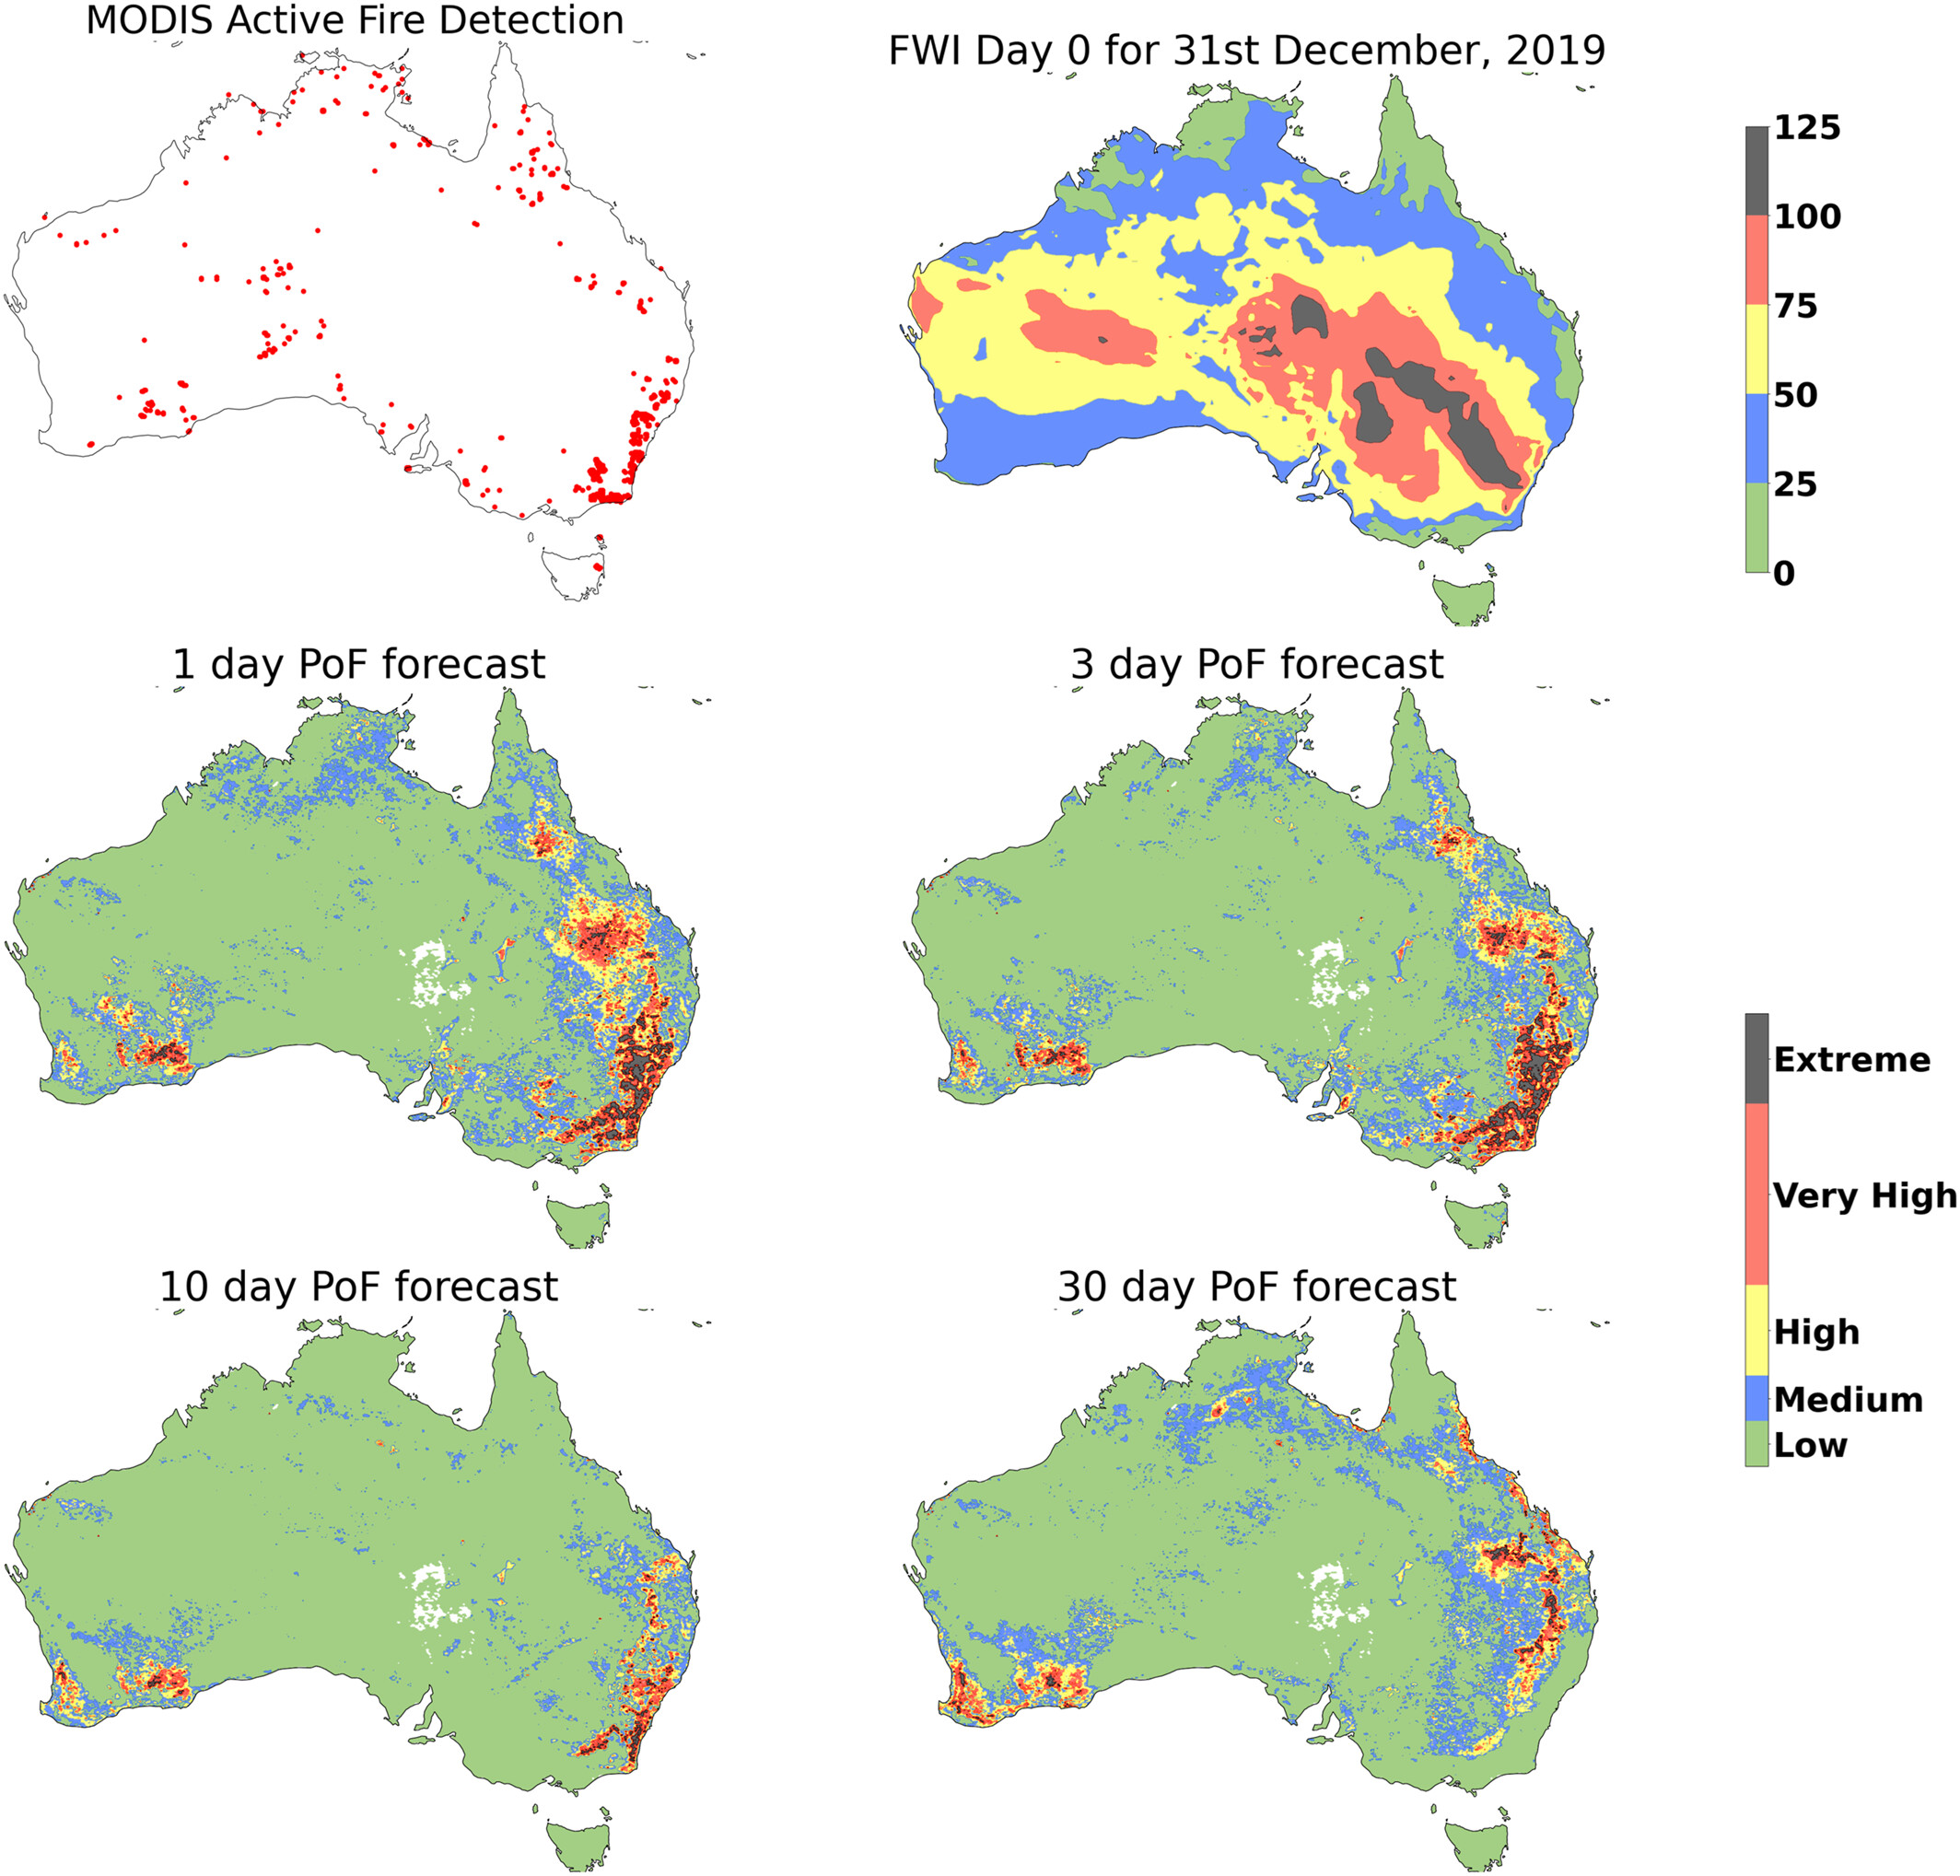

In [36]:
display(Image(filename = 'McNorton et al_Figure 3.jpg', width= 650, height= 650))

Here are the SHAP values obtained from the model:

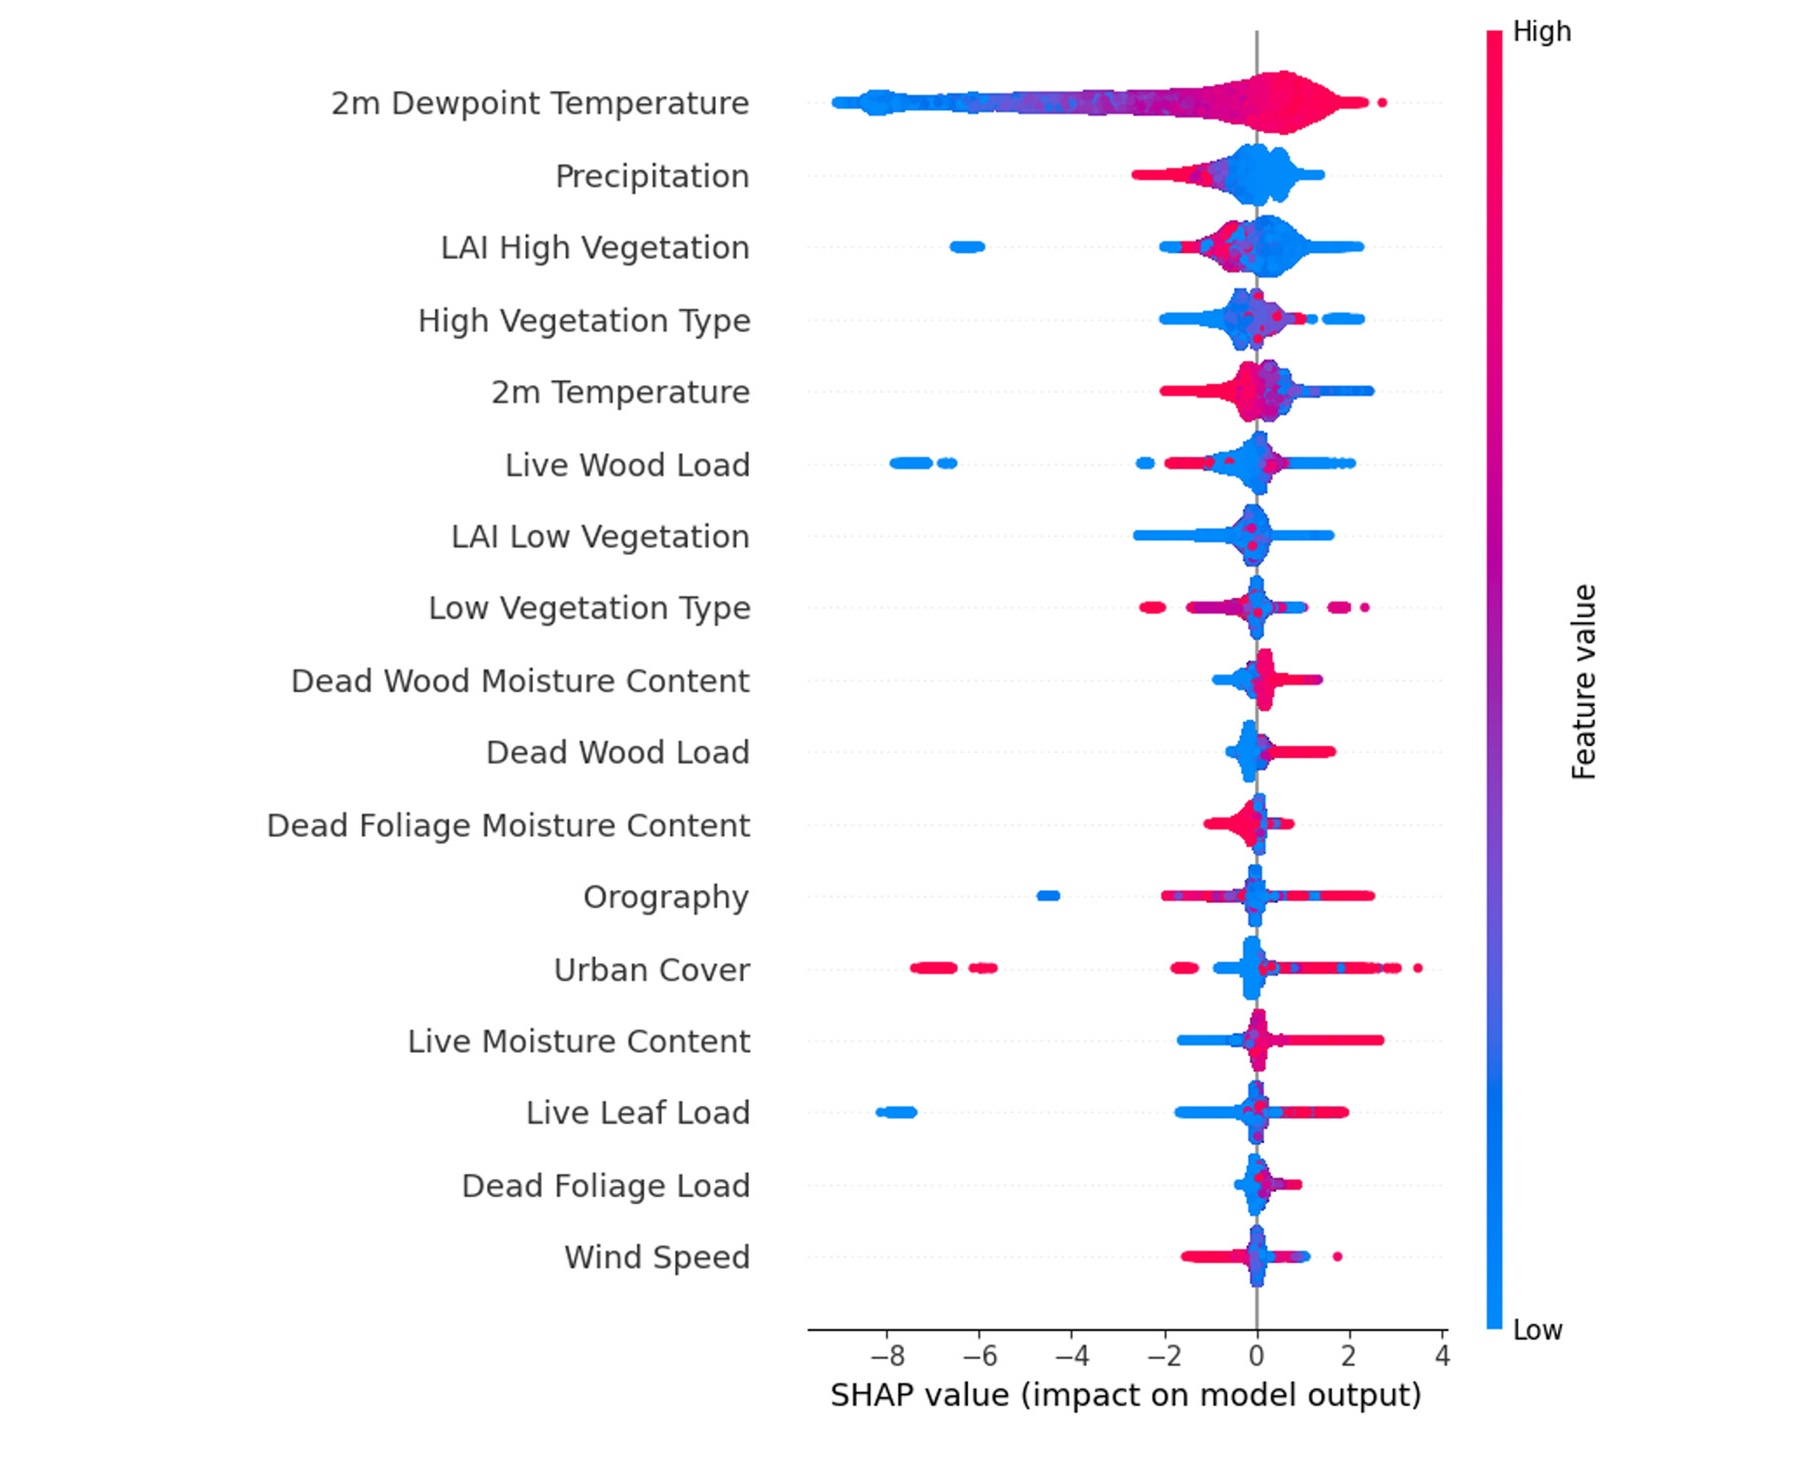

In [37]:
display(Image(filename = 'McNorton et al_Figure 4.jpg', width= 650, height= 650))

### How can we obtain shap values for an ML model?

- Use Scikit-learn to build the model (e.g., DecisionTreeRegressor, MLPRegressor).
- Install the "shap" library.
- Create an explainer for the model:
    - explainer = shap.TreeExplainer(model)  # For tree-based models like RandomForest
    - For linear models or others, use shap.KernelExplainer
- Compute SHAP values: shap_values = explainer.shap_values(X_test)
- Visualize the SHAP values for a single instance or the whole dataset: shap.summary_plot(shap_values, X_test)

## <center> In-class Exercise </center>